# Chapter 02 Walkthrough
## Drawing 2D Vectors



In [4]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

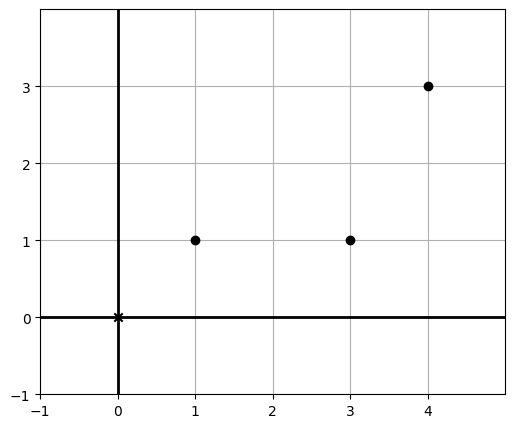

In [5]:
personal_vectors = [(1, 1), (3, 1), (4, 3)]

draw(
    Points(*personal_vectors)
)

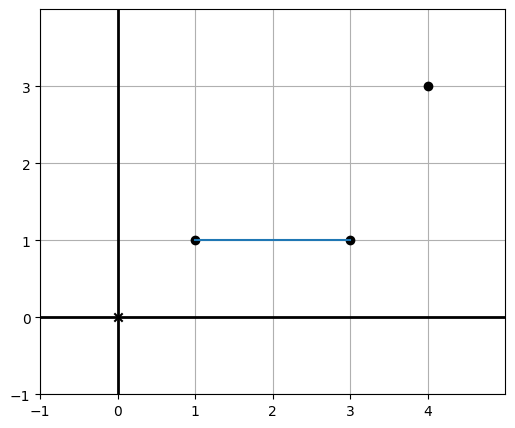

In [6]:
draw(
    Points(*personal_vectors),
    Segment((1, 1), (3, 1))
)

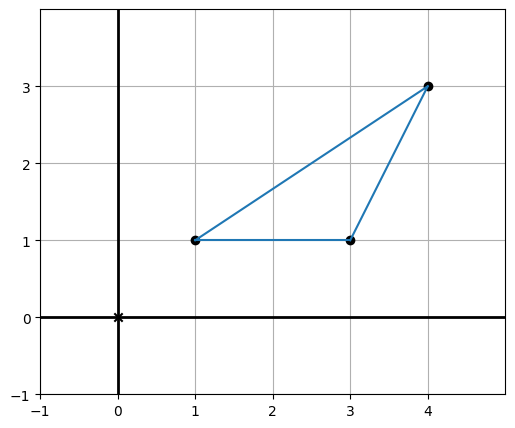

In [7]:
draw(
    Points(*personal_vectors),
    Polygon(*personal_vectors)
)

**Exercise 2.2:** Draw the point in the plane and the arrow corresponding to the point `(2, −2)`.

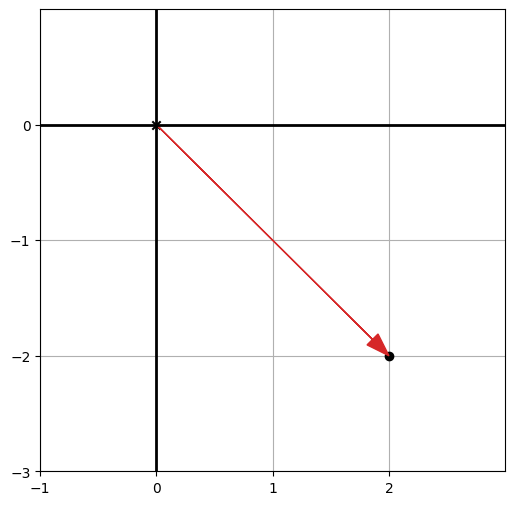

In [8]:
draw(
    Points((2, -2)),
    Arrow((2, -2))
)

**Exercise 2.3:** By looking at the locations of the dinosaur’s points, infer the remaining vectors not included in the `dino_vectors` list. For instance, I already included (6, 4), which is the tip of the dinosaur’s tail, but I didn’t include the point (−5, 3), which is a point on the dinosaur’s nose. When you’re done, `dino_vectors` should be a list of 21 vectors represented as coordinate pairs.

In [9]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), 
   (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3), 
   (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

**Exercise 2.4:** Draw the dinosaur with the dots connected by constructing a `Polygon` object with the `dino_vectors` as its vertices.

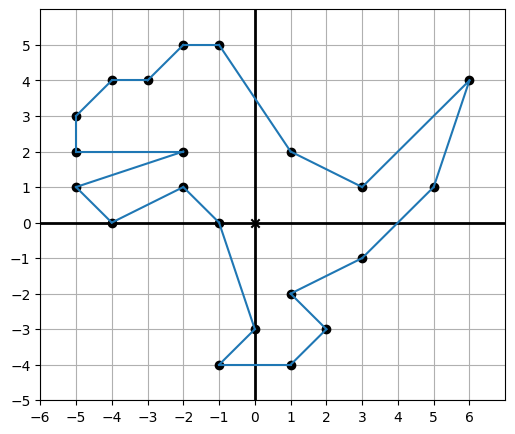

In [10]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**Exercise 2.5:** Draw the vectors `(x,x**2)` for x in the range from x = −10 to x = 11) as points (dots) using the `draw` function. What is the result?

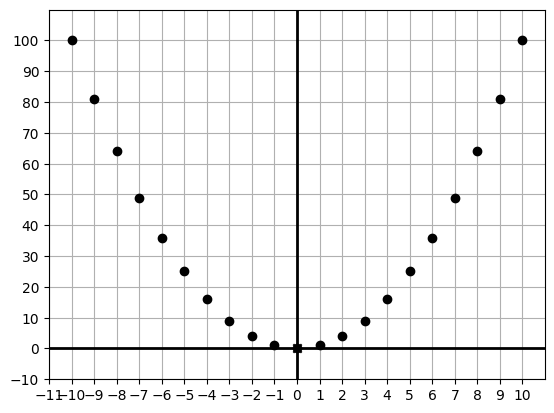

In [11]:
vectors2_5 = []
for x in range(-10, 11):
    vectors2_5.append((x, x**2))

draw(
    Points(*vectors2_5),
    grid=(1,10),
    nice_aspect_ratio=False
)

### 2.2 Plane Vector Arithmetic

In [12]:
# Implementation
def add(v1, v2):
   return (v1[0] + v2[0], v1[1] + v2[1])

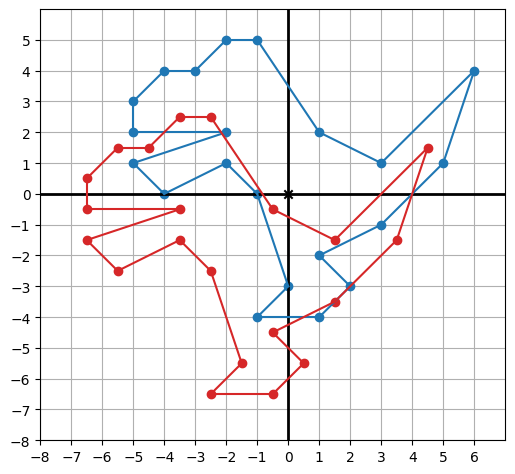

In [13]:
# Applying To Dino Vectors
dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]

draw(
   Points(*dino_vectors, color=blue),
   Polygon(*dino_vectors, color=blue),
   Points(*dino_vectors2, color=red),
   Polygon(*dino_vectors2, color=red)
)

**Exercise 2.6:** If the vector u = (−2, 0), 
the vector v = (1.5, 1.5), 
and the vector w = (4, 1), 

what are the results of u + v, v + w, 
and u + w? 
What is the result of u + v + w?

__u + v = (−0.5, 1.5)
v + w = (5.5, 2.5)
u + w = (2, 1)
u + v + w = (3.5, 2.5)__





**Exercise 2.7:** You can add any number of vectors together by summing all of their x-coordinates and all of their y-coordinates. For instance, the fourfold sum (1, 2) + (2, 4) + (3, 6) + (4, 8) has x component 1 + 2 + 3 + 4 = 10 and y component 2 + 4 + 6 + 8 = 20, making the result (10, 20). Implement a revised add function that takes any number of vectors as arguments.

In [14]:
def add(*vectors):
    x = 0
    y = 0
    for vector in vectors:
        x += vector[0]
        y += vector[1]
    return (x, y)

def addSolution(*vectors):
    return (sum([v[0] for v  in vectors]), sum([v[1] for v in vectors]))

print(add(*dino_vectors))
print(addSolution(*dino_vectors))

(-13, 18)
(-13, 18)


**Exercise 2.8**: Write a function translate(translation, vectors) that takes a translation vector and a list of input vectors, and returns a list of the input vectors all translated by the translation vector. For instance, translate ((1,1), [(0,0), (0,1,), (−3,−3)]) should return [(1,1),(1,2),(−2, −2)].

In [15]:
the_translation = (1,1)
the_vectors     = [(0,0), (0,1,), (-3,-3)]

def translate(translation, vectors):
   return [add(translation, v) for v in vectors]

print(translate(the_translation, the_vectors))

[(1, 1), (1, 2), (-2, -2)]


**Exercise 2.9**: Any sum of vectors v + w gives the same result as w + v. Explain why this is true using the definition of the vector sum on coordinates. Also, draw a picture to show why it is true geometrically.

Any Vectors: ```(v + w) === (w + v)```

v = (a, b) # RED

w = (c, d) # BLUE

v + w = (a + c, b + d) # GREEN

w + v = (c + a, d + b) # GREEN

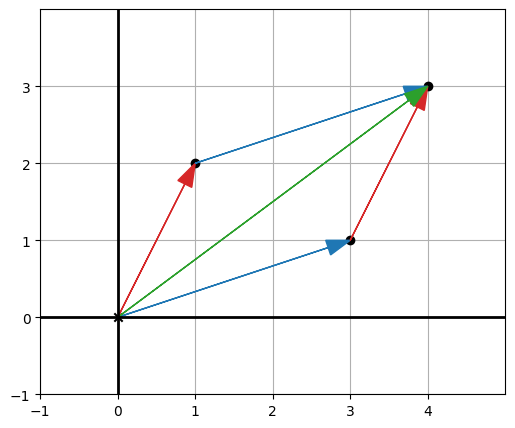

In [16]:
the_vectors_29 = [(1, 2), (3, 1)] # vectors v and w respectively
the_sum_vw  = add(*the_vectors_29)
the_vectors_29.append(the_sum_vw)

draw(
    Points(*the_vectors_29),
    Arrow(the_vectors_29[0], color=red),    # v
    Arrow(the_vectors_29[1], color=blue),   # w
    Arrow(the_sum_vw, the_vectors_29[0], color=blue),   # v -> v + w
    Arrow(the_sum_vw, the_vectors_29[1], color=red),    # w -> w + v
    Arrow(the_sum_vw, color=green)    # w -> w + v
)

**Exercise 2.10**: Among the following three arrow vectors (labeled u, v, and w), which pair has the sum that gives the longest arrow? Which pair sums to give the shortest arrow? (see book img)

SHORTEST - v + u
LONGEST - v + w

**Exercise 2.11-Mini Project**: Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur. This shows the power of computer graphics; imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

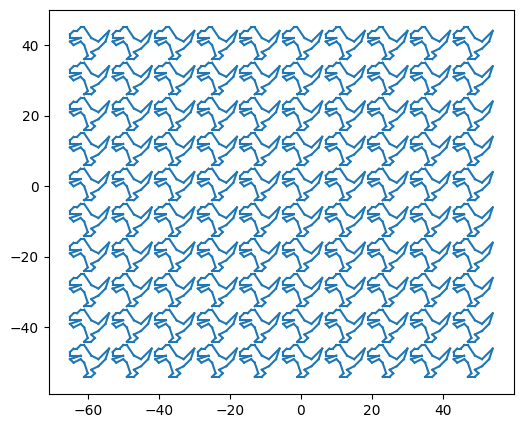

In [17]:
def hundred_dinos():
    translations = [(12 * x, 10 * y)
                    for x in range(-5, 5) # 10
                    for y in range(-5, 5)] # 10
    dinos = [Polygon(*translate(t, dino_vectors), color=blue)
             for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)


hundred_dinos()


**Exercise 2.12**: Which is longer, the x or y component of (3, −2) + (1, 1) + (−2, −2)?

In [18]:
x212 = 3 + 1 - 2
y212 = -2 + 1 - 2

print(x212)
print(y212)

print("Y bigger than X: ")
print(abs(y212) > abs(x212)) # y bigger than x


2
-3
Y bigger than X: 
True


**Exercise 2.13**: What are the components and lengths of the vectors (−6, −6) and (5, −12)?

Components:
- (-6, 0)   | X1
- (0, -6)   | Y1
- (5, 0)    | X2
- (0, -12)  | Y2

Lengths:
- (72**0.5)         | V1
- (169**0.5) = 13   | V2

**Exercise 2.14**: Suppose I have a vector v that has a length of 6 and an x component (1, 0). What are the possible coordinates of v?

# INSERT IMAGE

**Exercise 2.15**: What vector in the dino_vectors list has the longest length? Use the length function we wrote to compute the answer quickly.

In [19]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2) 

def printLengths():
    for v in dino_vectors:
        print(f'{v} : {length(v)}')

printLengths() # (6, 4) largest

(6, 4) : 7.211102550927978
(3, 1) : 3.1622776601683795
(1, 2) : 2.23606797749979
(-1, 5) : 5.0990195135927845
(-2, 5) : 5.385164807134504
(-3, 4) : 5.0
(-4, 4) : 5.656854249492381
(-5, 3) : 5.830951894845301
(-5, 2) : 5.385164807134504
(-2, 2) : 2.8284271247461903
(-5, 1) : 5.0990195135927845
(-4, 0) : 4.0
(-2, 1) : 2.23606797749979
(-1, 0) : 1.0
(0, -3) : 3.0
(-1, -4) : 4.123105625617661
(1, -4) : 4.123105625617661
(2, -3) : 3.605551275463989
(1, -2) : 2.23606797749979
(3, -1) : 3.1622776601683795
(5, 1) : 5.0990195135927845


**Exercise 2.16**: Suppose a vector w has the coordinates (√2, √3). What are the approximate coordinates of the scalar multiple π · w? Draw an approximation of the original vector and the new vector.

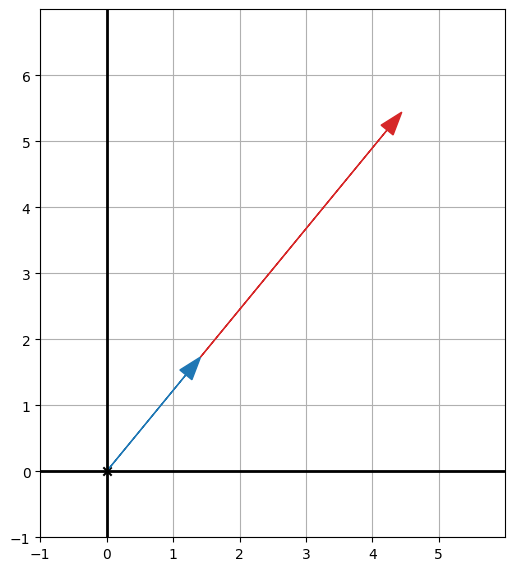

In [20]:
# Result => (π√2, π√3)
originalVector_216 = ((2**0.5), (3**0.5))
vector_216 = ((pi * (2**0.5)), (pi * (3**0.5)))

draw(
    Arrow(originalVector_216, color=blue),
    Arrow( vector_216, originalVector_216, color=red)
)

**Exercise 2.17**: Write a Python function scale(s,v) that multiplies the input vector v by the input scalar s.

In [21]:
def scale(s, v):
    return (v[0]*s, v[1]*s)


**Exercise 2.18−Mini Project**: Convince yourself algebraically that scaling the coordinates by a factor also scales the length of the vector by the same factor. Suppose a vector of length c has the coordinates (a, b). Show that for any non-negative real number s, the length of (s · a, s · b) is s · c. (This can’t work for a negative value of s because a vector can’t have a negative length.)

### IMAGE

**Exercise 2.19−Mini Project**: Suppose z = (−1, 1) and v = (1, 1), and suppose r and s are real numbers. Specifically, let’s assume −3 < r < 3 and −1 < s < 1. Where are the possible points on the plane where the vector r · u + s · v could end up?

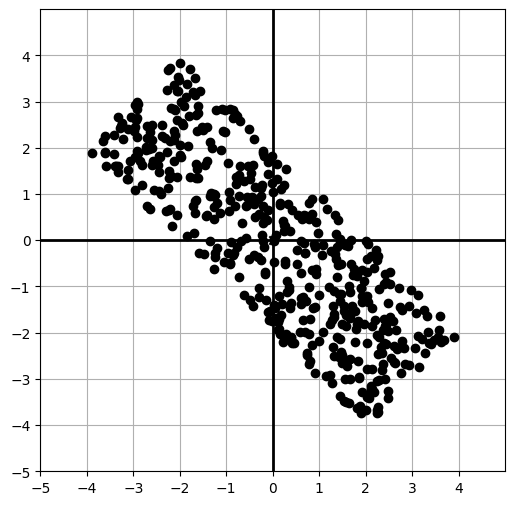

In [22]:
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
   return uniform(-3,3)
def random_s(): 
   return uniform(-1,1)

possibilities = [add(scale(random_r(), u), scale(random_s(), v))
                for i in range(0,500)]
draw(
   Points(*possibilities)
)

**Exercise 2.20**: Show algebraically why a vector and its opposite have the same length.

### IMAGE

**Exercise 2.21**: Of the following seven vectors, represented as arrows, which two are a pair of opposite vectors?

see book:
- v3 and v7

**Exercise 2.22**: Suppose u is any 2D vector. What are the coordinates of u + −u?

(0, 0)

**Exercise 2.23**: For vectors u = (−2, 0), v = (1.5, 1.5), and w = (4, 1), what are the results of the vector subtractions v − w, u − v, and w − v?

v − w = (−2.5, 0.5)

u − v = (−3.5, −1.5)

w − v = (2.5, −0.5)

**Exercise 2.24**: Write a Python function subtract(v1,v2) that returns the result of v1  - v2, taking two 2D vectors as inputs and returning a 2D vector as an output.

In [23]:
def subtract(v1,v2):
   return (v1[0] - v2[0], v1[1] - v2[1])

**Exercise 2.25**: Write a Python function distance(v1,v2) that returns the distance between two input vectors. (Note that the subtract function from the previous exercise already gives the displacement.)

Write another Python function perimeter(vectors) that takes a list of vectors as an argument and returns the sum of distances from each vector to the next, including the distance from the last vector to the first. What is the perimeter of the dinosaur defined by dino_vectors ?

In [24]:
def distance(v1,v2):
   return length(subtract(v1,v2))

def perimeter(vectors):
   distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                for i in range(0,len(vectors))]
   return sum(distances)

print(perimeter(dino_vectors))

44.77115093694563


**Exercise 2.26−Mini Project**: Let u be the vector (1, −1). Suppose there is another vector v with positive integer coordinates (n, m) such that n > m and has a distance of 13 from u. What is the displacement from u to v?

In [25]:
for n in range(-12,15):
   for m in range(-14, 13):
       if distance((n,m), (1,-1)) == 13 and n > m > 0:
           print((n,m))

(13, 4)


## Plane Vector Arithmetic

**Exercise 2.27**: Confirm that the vector given by Cartesian coordinates (−1.34, 2.68) has a length of approximately 3 as expected.

In [26]:
print(length((-1.34,2.68)))

2.9963310898497184


**Exercise 2.28**: The figure shows a line that makes a 22° angle in the counterclockwise direction from the positive x-axis. Based on the following picture, what is the approximate value of tan(22°)?

2/5

**Exercise 2.29**: Turning the question around, suppose we know the length and direction of a vector and want to find its components. What are the x and y components of a vector with length 15 pointing at a 37° angle?

In [27]:
from math import atan2, sin, cos


def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)

def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))


angle_229 = (37*pi) / 180

print(to_cartesian((15, angle_229)))


(11.979532650709393, 9.027225347280725)


**Exercise 2.30**: Suppose I travel 8.5 units from the origin at an angle of 125°, measured counterclockwise from the positive x-axis. Given that sin (125°) = 0.819 and cos (125°) = −0.574, what are my final coordinates? Draw a picture to show the angle and path traveled.

x = r · cos (θ) = 8.5 · −0.574 = −4.879

y = r · sin (θ) = 8.5 · 0.819 = 6.962

**Exercise 2.31**: What are the sine and cosine of 0°? Of 90°? Of 180°? In other words, how many vertical and horizontal units are covered per unit distance in any of these directions?

sin(0)      = 0

sin(90)     = 1

sin(180)    = 0

cos(0)      = 1

cos(90)     = 0

cos(180)    = -1

**Exercise 2.32**: The following diagram gives some exact measurements for a right triangle:

First, confirm that these lengths are valid for a right triangle because they satisfy the Pythagorean theorem. Then, calculate the values of sin(30°), cos(30°), and tan(30°) to three decimal places using the measurements in the diagram.

### DIAGRAM

**Exercise 2.33**: Looking at the triangle from the previous exercise from a different perspective, use it to calculate the values of sin(60°), cos(60°), and tan(60°) to three decimal places.

### DIAGRAM

**Exercise 2.34**: The cosine of 50° is 0.643. What is sin(50°) and what is tan(50°)? Draw a picture to help you calculate the answer.

sin(50) = 0.766

tan(50) = 1.192

**Exercise 2.35**: What is 116.57° in radians? Use Python to compute the tangent of this angle and confirm that it is close to −2 as we saw previously.

In [28]:
from math import tan
print(tan(2.035))


-1.9972227673316139


**Exercise 2.36**: Locate the angle 10π/6. Do you expect the values of cos(10π/6) and sin(10π/6) to be positive or negative? Use Python to calculate their values and confirm.

In [29]:
print(sin(10*pi/6))
print(cos(10*pi/6))

-0.8660254037844386
0.5000000000000001


**Exercise 2.37**: The following list comprehension creates 1,000 points in polar coordinates:

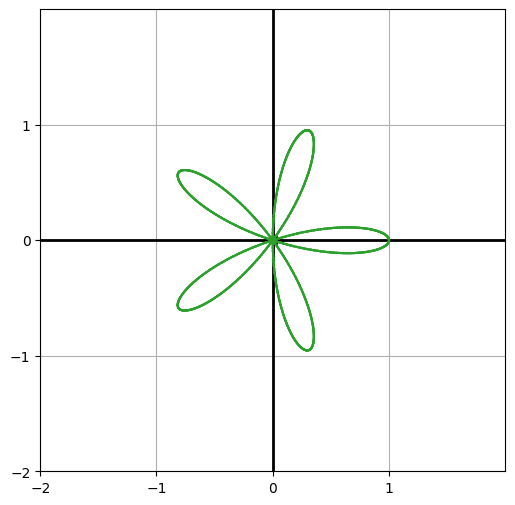

In [30]:
polar_237 = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_237]
draw(Polygon(*vectors, color=green))

**Exercise 2.38**: Find the angle to get to the point (−2, 3) by “guess-and-check.”

In [31]:
print(tan(2.159))

-1.4993467206361923


**Exercise 2.39**: Find another point in the plane with the same tangent as θ, namely −3/2. Use Python’s implementation of the arctangent function, math.atan, to find the value of this angle.

In [32]:
from math import atan

print(atan(-3/2))

-0.982793723247329


**Exercise 2.40**: Without using Python, what are the polar coordinates corresponding to the Cartesian coordinates (1, 1) and (1, −1)? Once you’ve found the answers, use to_polar to check your work.

(1, 1) becomes (√2, π/4)

(1, −1) becomes (√2, -π/4)

**Exercise 2.42**: Create a rotate(angle, vectors) function that takes an array of input vectors in Cartesian coordinates and rotates those by the specified angle (counterclockwise or clockwise, according to whether the angle is positive or negative).

In [33]:
def rotate(angle, vectors):
   polars = [to_polar(v) for v  in vectors]
   return [to_cartesian((l, a+angle)) for l, a in polars]

**Exercise 2.43**: Create a function regular_polygon(n) that returns Cartesian coordinates for the vertices of a regular n -sided polygon (that is, having all angles and side lengths equal). For instance, polygon(7) produces vectors defining the following heptagon:

In [34]:
def regular_polygon(n):
   return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

**Exercise 2.44**: What is the result of first translating the dinosaur by the vector (8, 8) and then rotating it by 5π/3? Is the result the same as rotating and then translating?

In [49]:
translate((8,8), dino_vectors)
rotate((5/3), translate((8,8), dino_vectors))

[(-13.285025165222436, 12.787028832352203),
 (-10.011630647924017, 10.087975603140034),
 (-10.81559150964703, 8.001436139622127),
 (-13.610368286873573, 5.723449580075473),
 (-13.5146447388592, 4.7280416223237065),
 (-12.423513233093058, 3.828357212586318),
 (-12.327789685078685, 2.832949254834549),
 (-11.236658179312542, 1.9332648450971646),
 (-10.241250221560778, 2.028988393111538),
 (-10.528420865603906, 5.015212266366831),
 (-9.245842263809013, 2.124711941125912),
 (-8.346157854071624, 3.215843446892054),
 (-9.53301290785214, 5.110935814381211),
 (-8.63332849811475, 6.202067320147348),
 (-5.742828172873828, 7.484645921942242),
 (-4.6516966671076885, 6.584961512204853),
 (-4.843143763136439, 8.575777427708383),
 (-5.93427526890258, 9.475461837445772),
 (-6.833959678639972, 8.384330331679632),
 (-8.02081473242049, 10.279422699168785),
 (-10.203077743952766, 12.078791518643564)]